# **MultiLayer Perceptron (MLP)**
- A multilayer perceptron is a class of ANNs that consists of multiple layers (hidden layers) of neurons in a feed-forward network.
---

## 🔁 **Training Process of a Multi-Layer Perceptron (MLP)**

---

### **1. Data Preparation**

- ✅ **Feature Scaling**: Normalize or standardize input features to improve convergence (e.g., `StandardScaler`, `MinMaxScaler`).
- ✅ **Train-Test Split**: Divide the dataset into training and testing (and optionally validation) sets.
- ✅ **Label Encoding**:
  - **Binary Classification**: Encode as 0 and 1.
  - **Multiclass Classification**: Use one-hot encoding for softmax activation.
  - **Regression**: No label encoding needed.

---

### **2. Model Initialization**

- 🧠 **Weights** (`W`): Initialized with small random values (e.g., from a Gaussian distribution).
- ⚙️ **Biases** (`b`): Typically initialized to zeros.
- 📌 Initialize for:
  - **Input → Hidden Layer**: `W1`, `b1`
  - **Hidden → Output Layer**: `W2`, `b2`

---

### **3. Forward Propagation**

For each input batch `X`:

- 🔸 **Hidden Layer**:
  - Linear transformation: `Z1 = X·W1 + b1`
  - Activation (non-linearity): `A1 = f(Z1)` where `f` = ReLU / tanh / sigmoid
- 🔸 **Output Layer**:
  - Linear transformation: `Z2 = A1·W2 + b2`
  - Activation:
    - **Regression**: No activation (raw output)
    - **Binary Classification**: Sigmoid
    - **Multiclass Classification**: Softmax → Gives class probabilities

---

### **4. Loss Computation**

- 📉 **Regression**:  
  $$\text{Loss} = \frac{1}{n} \sum (y_{\text{true}} - y_{\text{pred}})^2$$ *(Mean Squared Error)*

- 📊 **Classification**:
  - **Binary**: Binary Cross-Entropy  
    $$\text{Loss} = -\frac{1}{n} \sum [y\log(p) + (1-y)\log(1-p)]$$
  - **Multiclass**: Categorical Cross-Entropy  
    $$\text{Loss} = -\frac{1}{n} \sum \sum y_i \log(p_i)$$

---

### **5. Backward Propagation (Gradient Descent)**

- 🔁 Apply **Chain Rule** to compute partial derivatives of loss with respect to:
  - Weights: `∂L/∂W`
  - Biases: `∂L/∂b`
- ♻️ Backpropagate error from output to hidden to input.
- 🔧 **Update Rules**:
  - $$W := W - \alpha \cdot \frac{\partial L}{\partial W}$$  
  - $$b := b - \alpha \cdot \frac{\partial L}{\partial b}$$  
    where `α` is the **learning rate**

---

### **6. Training Loop (Epochs)**

- Repeat steps **Forward → Loss → Backward → Update** for multiple **epochs**.
- Optionally use **mini-batch gradient descent** for larger datasets.
- Monitor **loss & accuracy** over epochs for convergence.

---

## 🔁 **Multi-Layer Perceptron (MLP) Training Pipeline with Outputs**

---

**1. 📊 Data Preparation**
| Step | Description | Output |
|------|-------------|--------|
| Feature Scaling | Normalize/standardize input features (e.g., using `StandardScaler`) | Scaled input matrix `X_scaled` |
| Train-Test Split | Divide dataset into training and test (and validation if needed) | `X_train`, `y_train`, `X_test`, `y_test` |
| Label Encoding | Convert class labels into integers or one-hot format | `y_train_encoded`, `y_test_encoded` |

**2. ⚙️ Model Initialization**
| Step | Description | Output |
|------|-------------|--------|
| Initialize Weights | Random values for `W1`, `W2` using small Gaussian values | `W1`: shape `(input_size, hidden_size)`<br>`W2`: shape `(hidden_size, output_size)` |
| Initialize Biases | Zero vectors for `b1`, `b2` | `b1`: shape `(1, hidden_size)`<br>`b2`: shape `(1, output_size)` |

**3. 🔄 Forward Propagation**
| Step | Description | Output |
|------|-------------|--------|
| Input → Hidden | `Z1 = X · W1 + b1` | `Z1`: raw scores for hidden layer |
| Activation (Hidden) | Apply ReLU/tanh/sigmoid → `A1 = f(Z1)` | `A1`: activated outputs from hidden layer |
| Hidden → Output | `Z2 = A1 · W2 + b2` | `Z2`: raw scores for output layer |
| Activation (Output) | Apply sigmoid (binary) or softmax (multiclass) → `probs = f(Z2)` | `probs`: prediction probabilities for each class |

**4. 📉 Loss Computation**
| Step | Description | Output |
|------|-------------|--------|
| Classification Loss | Cross-Entropy (Binary or Multiclass) | `loss`: Scalar value showing current loss |
| Accuracy | Compare predicted vs. true labels | `accuracy`: % of correct predictions |

**5. 🔁 Backward Propagation**
| Step | Description | Output |
|------|-------------|--------|
| Output Layer Gradients | Derivatives w.r.t. `W2`, `b2` | `dW2`, `db2` |
| Hidden Layer Gradients | Derivatives w.r.t. `W1`, `b1` | `dW1`, `db1` |
| Update Parameters | Apply gradient descent to update `W1`, `W2`, `b1`, `b2` | Updated weights and biases |

**6. 🔁 Epoch Loop**
| Step | Description | Output |
|------|-------------|--------|
| Repeat Forward → Loss → Backward | Run for `n_epochs` | Trends of `loss_history`, `accuracy_history` |
| Print Every N Epochs | Log progress | Epoch-wise loss & accuracy |

**7. 🧪 Model Testing (on unseen data)**
| Step | Description | Output |
|------|-------------|--------|
| Run Forward Prop on `X_test` | Get predictions on test set | `test_probs`, `test_preds` |
| Compute Final Loss/Accuracy | Evaluate generalization | `test_loss`, `test_accuracy` |

**8. ✅ Predictions (New Data)**
| Step | Description | Output |
|------|-------------|--------|
| Forward Pass on new input | e.g., `nn.forward(sample_input)` | `probabilities`, `predicted_class` |
| Convert to Class Labels | Use `np.argmax()` if softmax | Actual class prediction like `'setosa'`, `'versicolor'` |

---

# **Programe**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier # sklearn library
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import os

**Load Data**

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
df_iris = pd.DataFrame(data = iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target
df_iris.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
53,5.5,2.3,4.0,1.3,1
122,7.7,2.8,6.7,2.0,2
147,6.5,3.0,5.2,2.0,2
74,6.4,2.9,4.3,1.3,1
79,5.7,2.6,3.5,1.0,1


In [5]:
df_iris['target'].unique()

array([0, 1, 2])

In [6]:
df_iris['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [9]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
# data splitting
x = iris.data
y = iris.target

In [12]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [11]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

---
### 🚀 Why Use **OneHotEncoder** for Features (X)

Imagine a feature `Color = ['Red', 'Green', 'Blue']`.

#### 🔴 Using LabelEncoder:
- Red → 0, Green → 1, Blue → 2  
- ⚠️ Implies "Blue > Green > Red" which has **no meaning** (can mislead the model)

#### 🟢 Using OneHotEncoder:
- Red → `[1, 0, 0]`, Green → `[0, 1, 0]`, Blue → `[0, 0, 1]`  
- ✅ Removes order assumption, treats categories as **distinct entities**

---

### 🤖 Neural Networks and MLP:
MLPs generally work better with **OneHotEncoder** for input features — especially in classification tasks — because they can’t inherently understand categorical indices unless they are one-hot encoded.

In [14]:
# one hot encoding
encoder = OneHotEncoder(sparse_output = False)
y = encoder.fit_transform(y.reshape(-1,1))

In [15]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

**Creating Model**

In [49]:
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, learning_rate = 0.01, epochs = 100):
        self.input_size = input_size # no.of features in the input layer
        self.hidden_size = hidden_size # no. of neurons in the hidden layer
        self.output_size = output_size # no. of neurons in the output layer
        self.learning_rate = learning_rate # learning rate for gradient descent step
        self.epochs = epochs

        #################################
        ## Input Layer to Hidden Layer ##
        #################################
        # weights and bias initialization
        self.W1 = np.random.randn(self.input_size, self.hidden_size)*0.01
        self.b1 = np.zeros((1,self.hidden_size))

        ##################################
        ## Hidden Layer to Output Layer ##
        ##################################
        # Random weights from hiden layer to output layer and bias for output layer
        self.W2 = np.random.randn(self.hidden_size,self.output_size)*0.01
        self.b2 = np.zeros((1,self.output_size))

        # Loss History & accuracy history for plotting
        self.loss_history = []
        self.accuracy_history = []

    """
    Activation Function
    """
    # ReLU activation function
    def relu(self, z):
        return np.maximum(0,z)

    # Derivative of ReLU for BackPropagation
    def relu_derivative(self, z):
        return np.where(z>0, 1, 0)

    # Softmax for multiclass classification
    def softmax(self, z):
        exp_values = np.exp(z - np.max(z,axis = 1, keepdims = True)) # subtract max for numerical stability
        return exp_values/np.sum(exp_values, axis = 1, keepdims = True)

    """
    Forward Propagation
    """
    def forward(self, x):
        #################################
        ## Input Layer to Hidden Layer ##
        #################################
        # computes the activated value in the hidden layer using ReLU function
        self.z1 = np.dot(x, self.W1) + self.b1
        # print('First weighted sum : ', self.z1.shape)
        self.a1 = self.relu(self.z1)
        # print('First activated values : ', self.a1.shape)

        ##################################
        ## Hidden Layer to Output Layer ##
        ##################################
        # computes the probabilities using softmax for multi-class classification
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.probs = self.softmax(self.z2)
        # print('Class Probabilities : ', self.probs.shape)

        return self.probs

    """
    Loss Computation
    """
    # cross-entropy loss for multiclass classification
    def compute_loss(self, y_true, probs):
        loss = -np.mean(np.sum(y_true*np.log(probs), axis = 1))
        return loss

    # compute accuracy
    def compute_accuracy(self, y_true, probs):
        predictions = np.argmax(probs, axis = 1)
        true_labels = np.argmax(y_true, axis = 1)
        return np.mean(predictions == true_labels)

    """
    Backward Propagation
    """
    def backward(self, x, y):
        m = x.shape[0]

        # Gradients of the loss w.r.t weights and biases of the ouput layer
        delta3 = self.probs - y
        dW2 = np.dot(self.a1.T, delta3)/m
        db2 = np.sum(delta3, axis = 0, keepdims = True)/m

        # Gradients of the loss w.r.t weights and biases of the hidden layer
        delta2 = np.dot(delta3, self.W2.T) * self.relu_derivative(self.z1)
        dW1 = np.dot(x.T, delta2)/m
        db1 = np.sum(delta2, axis = 0, keepdims = True)/m

        # Update the parameters : weights and biases across the layers
        self.W2 -= self.learning_rate * dW2
        self.b2 -= self.learning_rate * db2
        self.W1 -= self.learning_rate * dW1
        self.b1 -= self.learning_rate * db1

    """
    Training
    """
    def train(self, x, y):
        for epoch in range(self.epochs):

            # Forward Pass
            probs = self.forward(x)

            # Compute the categorical cross-entropy loss
            loss = self.compute_loss(y, probs)
            accuracy = self.compute_accuracy(y,probs)
            self.loss_history.append(loss)
            self.accuracy_history.append(accuracy)

            # Backward pass
            self.backward(x, y)

            # Print the progress after every 10 epochs
            if epoch % 10 == 0:
                print(f'Epoch : {epoch}, Loss : {loss:.4f}, Accuracy : {accuracy:.4f}')

    """
    Testing
    """
    def test(self, x_test, y_test):
        probs = self.forward(x_test)
        loss = self.compute_loss(y_test, probs)
        accuracy = self.compute_accuracy(y_test, probs)
        print(f'Test Loss : {loss:.4f}, Test Accuracy : {accuracy:.4f}')
        return loss, accuracy    

**Initialize the network**

In [50]:
# for the iris dataset
input_size = 4
hidden_size = 8 # 2*input size is max we generally take
output_size = 3

**Fire the model**

In [51]:
nn = NeuralNetwork(input_size, hidden_size, output_size, learning_rate = 0.03, epochs = 500)

In [52]:
nn

In [53]:
nn.train(x_train, y_train)

Epoch : 0, Loss : 1.0986, Accuracy : 0.3250
Epoch : 10, Loss : 1.0984, Accuracy : 0.3417
Epoch : 20, Loss : 1.0983, Accuracy : 0.3417
Epoch : 30, Loss : 1.0980, Accuracy : 0.3417
Epoch : 40, Loss : 1.0976, Accuracy : 0.3417
Epoch : 50, Loss : 1.0968, Accuracy : 0.3417
Epoch : 60, Loss : 1.0953, Accuracy : 0.3417
Epoch : 70, Loss : 1.0927, Accuracy : 0.4083
Epoch : 80, Loss : 1.0880, Accuracy : 0.5000
Epoch : 90, Loss : 1.0799, Accuracy : 0.3250
Epoch : 100, Loss : 1.0671, Accuracy : 0.3250
Epoch : 110, Loss : 1.0483, Accuracy : 0.3250
Epoch : 120, Loss : 1.0227, Accuracy : 0.3250
Epoch : 130, Loss : 0.9885, Accuracy : 0.5500
Epoch : 140, Loss : 0.9449, Accuracy : 0.6583
Epoch : 150, Loss : 0.8983, Accuracy : 0.6583
Epoch : 160, Loss : 0.8504, Accuracy : 0.6583
Epoch : 170, Loss : 0.8002, Accuracy : 0.6583
Epoch : 180, Loss : 0.7469, Accuracy : 0.6583
Epoch : 190, Loss : 0.6929, Accuracy : 0.6667
Epoch : 200, Loss : 0.6426, Accuracy : 0.6833
Epoch : 210, Loss : 0.5987, Accuracy : 0.6917

**Plot Loss and Accuracy vs Epochs**

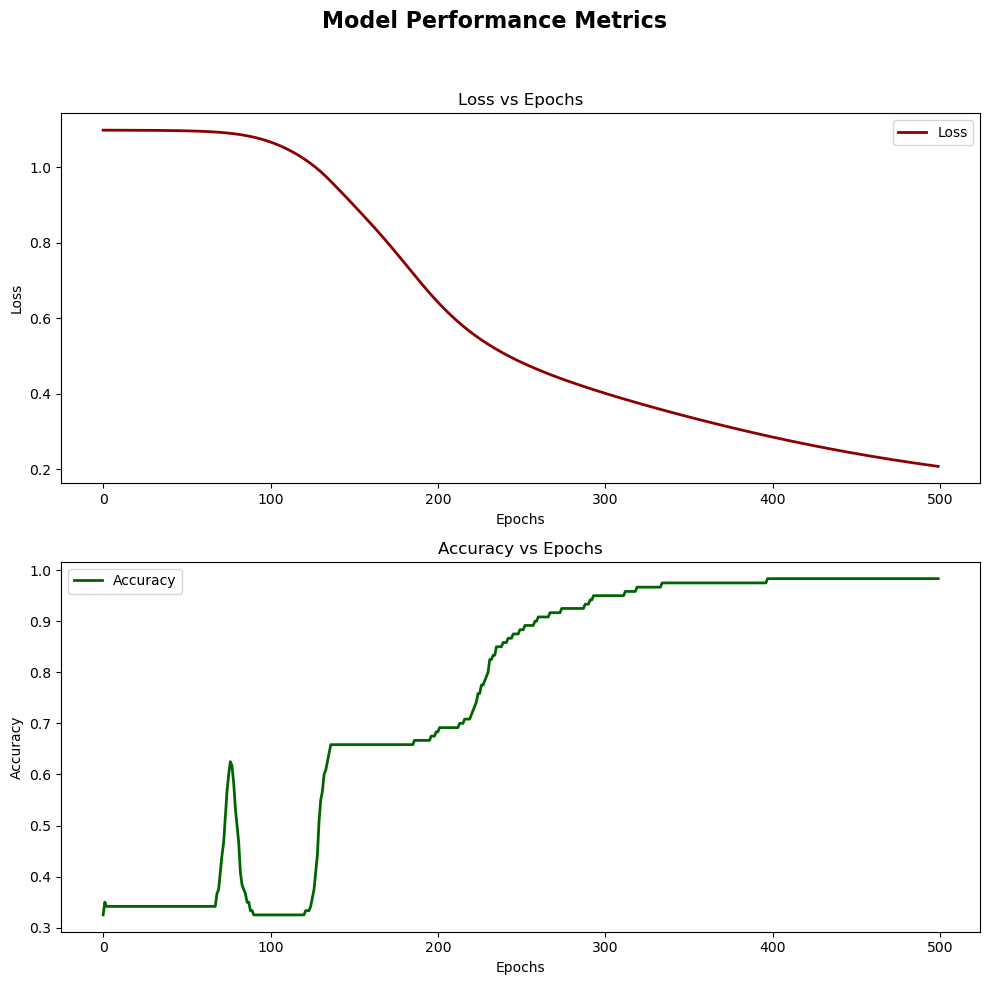

In [54]:
fig, ax = plt.subplots(2,1, figsize = (10,10))

### Plot the loss by epoch
ax[0].plot(nn.loss_history, label='Loss', color='darkred', linewidth=2)
ax[0].set_title('Loss vs Epochs')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Loss')
ax[0].legend()


### Plot the accuracy by epoch
ax[1].plot(nn.accuracy_history, label='Accuracy', color='darkgreen', linewidth=2)
ax[1].set_title('Accuracy vs Epochs')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Accuracy')
ax[1].legend()

### Add a super title
plt.suptitle('Model Performance Metrics', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit the super title

plt.show()

**Make Predictions using Forward Pass**

In [55]:
# Sample from Iris-setosa
new_sample = np.array([[5.1, 3.5, 1.4, 0.2]])

# Step 2: Predict probabilities
probs = nn.forward(new_sample)

# Step 3: Get predicted class
predicted_class = np.argmax(probs, axis=1)

print("Predicted Class Index:", predicted_class)
print("Class Name:", iris.target_names[predicted_class[0]])


Predicted Class Index: [0]
Class Name: setosa


In [57]:
# Take a few new samples from the test set for prediction
sample_inputs = x_test[:5]
true_labels = np.argmax(y_test[:5], axis=1)

# Predict using the trained neural network
predicted_probs = nn.forward(sample_inputs)
predicted_classes = np.argmax(predicted_probs, axis=1)

# Map class indices to class names
predicted_class_names = iris.target_names[predicted_classes]
true_class_names = iris.target_names[true_labels]

# Prepare and display results
list(zip(true_class_names, predicted_class_names))


[('versicolor', 'versicolor'),
 ('setosa', 'setosa'),
 ('virginica', 'virginica'),
 ('versicolor', 'versicolor'),
 ('versicolor', 'versicolor')]